In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


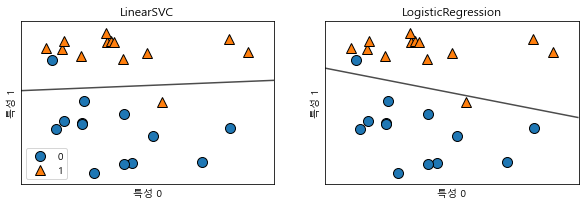

In [2]:
#로지스틱 회귀와 선형 SVC 결정 경계 비교
x,y = mglearn.datasets.make_forge()

fig,axes =plt.subplots(1,2,figsize=(10,3))

for model,ax in zip([LinearSVC(max_iter=5000),LogisticRegression()],axes):
    clf=model.fit(x,y)
    mglearn.plots.plot_2d_separator(clf,x,fill=False,eps=0.5,ax=ax,alpha=.7)
    mglearn.discrete_scatter(x[:,0],x[:,1],y,ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend()
plt.show()

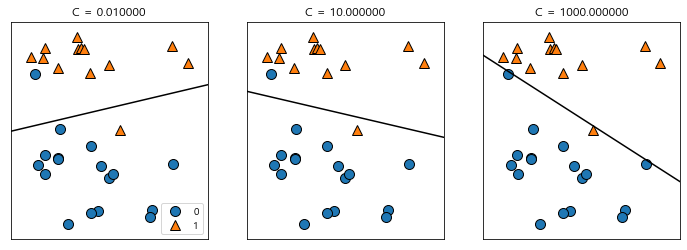

In [3]:
mglearn.plots.plot_linear_svc_regularization()
#C값에 따른 선형 SVC 비교

# Logistic Regression

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()
#데이터 수집
x_train,x_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
#데이터 분할
logreg=LogisticRegression(max_iter=5000).fit(x_train,y_train)
#모델 선정,학습
print("훈련 세트 점수:{:.3f}".format(logreg.score(x_train,y_train)))
print("테스트 세트 점수:{:.3f}".format(logreg.score(x_test,y_test)))
#분류 모델이므로 model.score()의 기준은 Accurcay

훈련 세트 점수:0.958
테스트 세트 점수:0.958


훈련 세트의 정확도와 테스트 세트의 정확도가 너무나 비슷하여 과소적합이 의심됨

In [5]:
logreg100=LogisticRegression(C=100,max_iter=5000).fit(x_train,y_train)
#모델 선정,학습
print("훈련 세트 점수:{:.3f}".format(logreg100.score(x_train,y_train)))
print("테스트 세트 점수:{:.3f}".format(logreg100.score(x_test,y_test)))
#분류 모델이므로 model.score()의 기준은 Accurcay

훈련 세트 점수:0.984
테스트 세트 점수:0.965


C=100을 사용하니 훈련세트와 테스트 세트의 정확도가 증가함, 이는 복잡도가 높은 모델일수록 성능이 좋음을 의미함

In [6]:
logreg001=LogisticRegression(C=0.001,max_iter=5000).fit(x_train,y_train)
#모델 선정,학습
print("훈련 세트 점수:{:.3f}".format(logreg001.score(x_train,y_train)))
print("테스트 세트 점수:{:.3f}".format(logreg001.score(x_test,y_test)))
#분류 모델이므로 model.score()의 기준은 Accurcay

훈련 세트 점수:0.953
테스트 세트 점수:0.944


### 매개변수 C 설정에 따른 로지스틱 회귀모델의 계수 비교하기|

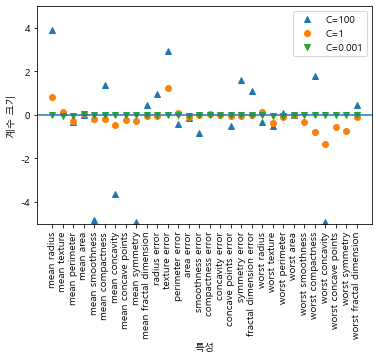

In [7]:
plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg001.coef_.T,'v',label="C=0.001")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel('특성')
plt.ylabel('계수 크기')
plt.legend()
plt.show()

## note

LogisticRegression은 기본으로 L2 규제를 적용하므로 Ridge로 만든 그래프와 비슷한 모습을 가집니다.

규제를 강하게 할수록 계수들을 0에 가깝게 만들지만 완전히 0이 되지는 않습니다.

이 그림을 자세히 보면 세번째 계수(mean perimeter)에서 재밌는 현상을 확인할 수 있습니다.

C=100,1일때 이 계수는 음수지만 C=0.001일때 이 계수는 양수가 되며 C=1일때 보다 절댓값이 더 큽니다.

이와 같은 모델을 해석하면 계수가 클래스와 특성의 연관성을 알려줄 수 있습니다.
예를 들면 "texture error" 특성은 악성인 샘플과 관련이 깊습니다.

그러나 'mean perimeter'계수의 부호가 바뀌는 것으로 보아 높은 'mean perimeter'의 값은 양성이나 악성의 신호 모두가 될 수 있습니다.

그래서 선형모델의 계수는 항상 의심해봐야하고 조심해서 해석해야 합니다.

### L1 규제를 사용할 때의 분류 정확도와 계수 그래프

C가 0.001인 로지스틱 회귀의 훈련 세트 점수:0.913
C가 0.001인 로지스틱 회귀의 테스트 세트 점수:0.923
C가 1.000인 로지스틱 회귀의 훈련 세트 점수:0.960
C가 1.000인 로지스틱 회귀의 테스트 세트 점수:0.958
C가 100.000인 로지스틱 회귀의 훈련 세트 점수:0.986
C가 100.000인 로지스틱 회귀의 테스트 세트 점수:0.979


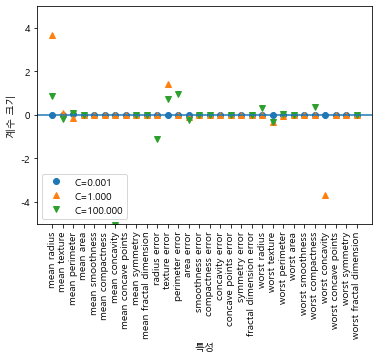

In [8]:
for C,marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(solver='liblinear',C=C,penalty='l1',max_iter=1000).fit(x_train,y_train)
    print("C가 {:.3f}인 로지스틱 회귀의 훈련 세트 점수:{:.3f}".format(C,lr_l1.score(x_train,y_train)))
    print("C가 {:.3f}인 로지스틱 회귀의 테스트 세트 점수:{:.3f}".format(C,lr_l1.score(x_test,y_test)))
    plt.plot(lr_l1.coef_.T,marker,label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel('특성')
plt.ylabel('계수 크기')
plt.legend(loc=3)
plt.show()

여기서 볼 수 있듯, 이진 분류에서의 선형 모델과 회귀에서의 선형 모델 사이에는 유사점이 많습니다

모델들의 주요 차이는 규제에서 모든 특성을 이용할지 일부 특성만을 이용할지 결정하는 penalty 매개변수입니다.

## note

LinearSVC는 loss 매개변수에 사용할 손실 함수를 지정합니다.
기본값은 제곱 힌지 손실인 'squared_hinge'입니다. 제곱 힌지 손실 함수는 penalty 매개변수에 'l1','l2'를 지정할 수 있습니다.

다른 손실함수로는 힌지 손실인 'hinge'를 지정할 수 있습니다. 이때는 penalty 매개변수에 'l2'만 사용할 수 있습니다

LogisticRegression은 penalty 매개변수에 'l1','l2', 두 규제를 모두 사용하는 'elasticnet' 아니면 규제를 사용하지 않는 'none'으로 지정할 수 있습니다.

사용할 알고리즘을 지정하는 solver 매개변수를 'saga'로 지정하면 모든 패널티를 지정할 수 있습니다.
solver 매개변수를 'liblinear'로 지정하면 'l1','l2'를 지정할 수 있습니다. 그 외 'newton-cg','lbfgs','sag'는 'l2'와 'none'만 지원합니다

LogisticRegression과 LinearSVC는 scikit-learn 0.20버전부터 verbose 매개변수와 상관없이 알고리즘이 max_iter 반복 안에 수렴하지 않을 경우 반복횟수를 증가하라는 경고를 출력합니다.

LogisticRegression의 max_iter 기본값은 100이고  LinearSVC의 max_iter 기본값은 1000입니다.

LogisticRegression의 solver가 'saga','sag','liblinear'일때나 LinearSVC는 기본적으로 훈련하기 전에 데이터를 섞습니다. 훈련 결과를 동일하게 재현해야 한다면 random_state 매개변수를 사용하세요. 

# LinearSVC

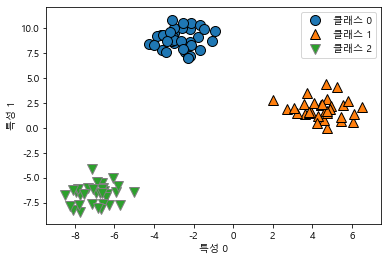

In [9]:
from sklearn.datasets import make_blobs

x,y = make_blobs(random_state=42)
mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.legend(["클래스 0","클래스 1","클래스 2"])

In [10]:
linear_svm=LinearSVC().fit(x,y) #모델 선정,학습
print("계수 배열의 크기:",linear_svm.coef_.shape)
print("절편 배열의 크기:",linear_svm.intercept_.shape)

계수 배열의 크기: (3, 2)
절편 배열의 크기: (3,)


### 세개의 일대 다 분류기가 만든 결정 경계

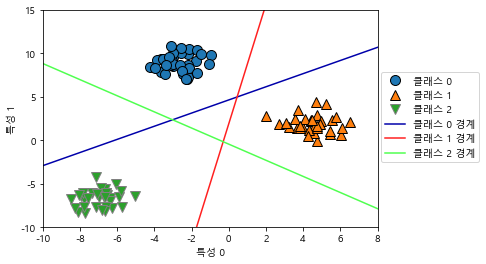

In [11]:
mglearn.discrete_scatter(x[:,0],x[:,1],y)
line = np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계'],loc=(1.01,0.3))
plt.show()

### 세개의 일대다 분류기가 만든 다중 클래스 결정 경계

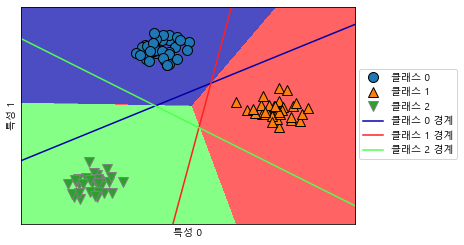

In [12]:
mglearn.plots.plot_2d_classification(linear_svm,x,fill=True,alpha=0.7)
mglearn.discrete_scatter(x[:,0],x[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계'],loc=(1.01,0.3))

plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()